In [1]:
#from keras.datasets import cifar10
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import os
import pandas as pd



In [2]:
data=pd.read_csv('/content/drive/MyDrive/odometer/odometer/labels_odometer_2021-06-23-11-57-37.csv',sep=',')
W=list(data['W'])
H=list(data['H'])
xmin=list(data['xmin'])
xmax=list(data['xmax'])
ymin=list(data['ymin'])
ymax=list(data['ymax'])
Img=list(data['imageid'])


In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data("/content/drive/MyDrive/odometer/odometer/")

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:

print(X_train[0].shape)#should be and is 32x32x3

(32, 32, 3)


In [ ]:

print(X_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [ ]:
seed=6
np.random.seed(seed)

#again load the dataset as we set the random seed and not apllying any shuffling effects or random effects
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# normalize the inputs from 0-255(RGB) to 0.0-1.0
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
X_train=X_train/255.0
X_test=X_test/255.0

In [ ]:
print(X_train[0])

[[[0.23137255 0.24313726 0.24705882]
  [0.16862746 0.18039216 0.1764706 ]
  [0.19607843 0.1882353  0.16862746]
  ...
  [0.61960787 0.5176471  0.42352942]
  [0.59607846 0.49019608 0.4       ]
  [0.5803922  0.4862745  0.40392157]]

 [[0.0627451  0.07843138 0.07843138]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509805 0.21568628]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117648 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215687 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941177 0.19607843]
  [0.47058824 0.32941177 0.19607843]
  [0.42745098 0.28627452 0.16470589]]

 ...

 [[0.8156863  0.6666667  0.3764706 ]
  [0.7882353  0.6        0.13333334]
  [0.7764706  0.6313726  0.10196079]
  ...
  [0.627451   0.52156866 0.27450982]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333334 0.07843138]]

 [[0.7058824  0.54509807 0.3764706 ]
  [0.6784314  0.48235294 0.16470589]


In [ ]:
#hot encode outputs
Y_train=np_utils.to_categorical(y_train)
Y_test=np_utils.to_categorical(y_test)
num_classes=Y_test.shape[1]


print(Y_train[0])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [ ]:
from keras.models import Sequential
from keras.layers import Dropout,Activation,Conv2D,GlobalAveragePooling2D
#conv2d is the main convulational layer
from keras.optimizers import SGD#stochastic gradient descent

In [ ]:
def allcnn(weights=None):
    #taking random weights ny default else usr passed pretrained weights
    
    model=Sequential()#we will be adding one layer after another
    
    #not the input layer but need to tell the conv. layer to accept input
    model.add(Conv2D(96,(3,3),padding='same',input_shape=(32,32,3)))#32x32x3 channels
    model.add(Activation('relu'))#required for each conv. layer
    model.add(Conv2D(96,(3,3),padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(96,(3,3),padding='same',strides=(2,2)))
    model.add(Dropout(0.5))#drop neurons randomly;helps the network generalize(prevent overfitting on training data) better so instead of having individual neurons 
    #that are controlling specific classes/features, the features are spread out over the entire network
    
    model.add(Conv2D(192,(3,3),padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192,(3,3),padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192,(3,3),padding='same',strides=(2,2)))
    model.add(Dropout(0.5))
    
    model.add(Conv2D(192,(3,3),padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192,(1,1),padding='valid'))
    model.add(Activation('relu'))
    model.add(Conv2D(10,(1,1),padding='valid'))
    
    # add GlobalAveragePooling2D layer with Softmax activation
    model.add(GlobalAveragePooling2D())
    model.add(Activation('softmax'))
    
    #load the weights,if passed
    if weights:
        model.load_weights(weights)
    
    #return model
    return model

In [ ]:
#define the hyper parameters(generic or do Grid Search)
learning_rate=0.01
weight_decay=1e-6
momentum=0.9

#define training parameters
epochs=350 #from research paper
batch_size=32#run 32 images times then update the parameters instead of updating them after every image

model=allcnn()

#define optimizer and compile model
sgd=SGD(lr=learning_rate,decay=weight_decay,momentum=momentum,nesterov=True)
model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])

print(model.summary())#1.3m parameters and all are trainable

# #fit the model(update the parameters and loss)
# model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=epochs,batch_size=batch_size,verbose=1)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 96)        2688      
_________________________________________________________________
activation (Activation)      (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 96)        83040     
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 96)        83040     
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 96)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 192)       1

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
# define hyper parameters
learning_rate = 0.01
weight_decay = 1e-6
momentum = 0.9
#no need for training parameters

# define weights and build model
weights='/content/all_cnn_weights_0.9088_0.4994.hdf5'#KERAS format hdf5
#pretrained weights  that have already gone through the above press
model=allcnn(weights)

# define optimizer and compile model
sgd = SGD(lr=learning_rate, decay=weight_decay, momentum=momentum, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
#measure of model's perfrmane is accuracy

# print model summary
print (model.summary())

# test the model with pretrained weights
scores=model.evaluate(X_test,Y_test,verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 96)        2688      
_________________________________________________________________
activation_7 (Activation)    (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 32, 96)        83040     
_________________________________________________________________
activation_8 (Activation)    (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 96)        83040     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 96)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 16, 16, 192)      

In [ ]:

print(predictions)
print(predictions.shape)

[[4.5647230e-18 1.0580984e-20 1.8923278e-10 2.1411404e-11 9.9999928e-01
  2.8037445e-07 3.1478666e-13 4.2381367e-07 1.3699609e-19 1.2097067e-18]
 [2.1190902e-16 2.0386702e-17 1.5672676e-09 5.3581516e-07 1.6256110e-10
  9.9999940e-01 1.6712491e-09 2.0782190e-08 3.6548193e-15 3.5128330e-16]
 [1.2720420e-30 5.0273835e-28 5.1540026e-24 3.6051407e-21 1.0875222e-27
  8.1522466e-22 1.0000000e+00 1.1050908e-27 6.1924619e-32 1.2274334e-23]
 [1.5143829e-16 4.7668876e-18 2.2583697e-09 1.0000000e+00 4.3481212e-11
  1.6884211e-12 4.5317211e-13 2.6687057e-16 7.2659426e-19 6.2049941e-17]
 [8.2502348e-36 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 9.3568037e-36 8.6868619e-30 8.2192576e-22]
 [5.9699731e-24 1.0000000e+00 7.5485268e-27 8.0228687e-27 1.9714101e-30
  2.7338922e-29 7.2188490e-31 5.5680368e-27 1.6186991e-26 1.1906196e-13]
 [6.4563548e-18 2.9642424e-20 1.0046496e-11 9.9999988e-01 6.0155895e-13
  9.1111161e-08 7.8874641e-12 1.1608701e-15 7.8587764e-21 

In [ ]:
#these are individual class probabilities, should sum to 1.0
for image in predictions:
    print(np.sum(image))

#shows that there is hundred percent probability that images to belong to one of the classes

1.0
0.99999994
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [ ]:
test=cv2.imread('/content/drive/MyDrive/odometer/odometer/images/00001.jpeg')
x=int(xmax[0])
y=int(xmin[0])
h=int(ymax[0])+x
w=int(ymin[0])+y

imgtest=test[y:w, x:h]


In [ ]:
!pip install easyocr 

     |████████████████████████████████| 63.2MB 104kB/s 


In [ ]:
import easyocr


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['000', '450534']

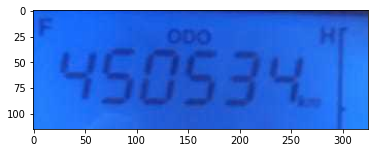

In [ ]:
plt.imshow(imgtest)
reader = easyocr.Reader(['en'])
bounds = reader.readtext(imgtest,detail=0,allowlist='0123456789')
bounds